In [1]:

import os
import pandas as pd

os.chdir('/home/nwong/chompsky/serial_chain/telephone-analysis-public')

from os.path import join, exists
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import load_runs
from new_models import prep_probs, sub_analysis_plots

import importlib


## Load editTable information from Prep notebook

In [2]:
# Load the results of scoring per model

WORD_CHANGES_FOLDER = './intermediate_results/word_changes'
word_change_path = join(WORD_CHANGES_FOLDER, 'word_change_probs.csv')

all_changes_probs = prep_probs.load_word_changes(WORD_CHANGES_FOLDER)

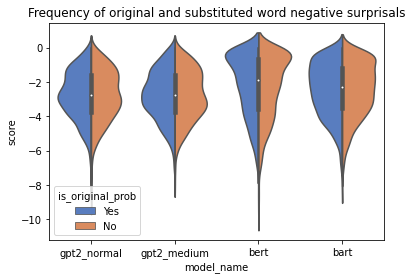

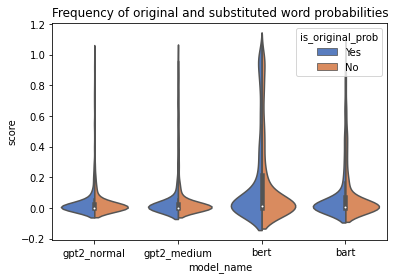

In [3]:

importlib.reload(sub_analysis_plots)

for use_neg_surprisal in [True, False]:
    all_model_dfs = sub_analysis_plots.gen_violin_plots(all_changes_probs, use_neg_surprisal)

    # 6/1: https://seaborn.pydata.org/generated/seaborn.violinplot.html

    score_type = 'negative surprisals' if use_neg_surprisal else 'probabilities'
    plt.title(f'Frequency of original and substituted word {score_type}')
    sns.violinplot(
        x = 'model_name', y = 'score',
        data = all_model_dfs,
        hue = 'is_original_prob',
        palette = 'muted',
        split = True
    )
    plt.show()
